In [1]:
#Download HSI Data
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

--2023-04-05 15:07:37--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat [following]
--2023-04-05 15:07:37--  https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat’

PaviaU.mat          100%[===================>]  33.19M   441KB/s    in 55s     

2023-04-05 15:08:33 (614 KB/s) - ‘PaviaU.mat’ saved [34806917/34806917]

URL transformed to HTTPS due to an HSTS policy
--2023-04-05 15:08:33--  https://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 O

In [2]:
!ls

PaviaU_gt.mat  PaviaU.mat  sample_data


In [8]:
## Importing Library.
from scipy.io import loadmat
dataset =loadmat('PaviaU.mat')['paviaU']
ground_truth=loadmat('PaviaU_gt.mat')['paviaU_gt']
#The dimensions of the data.
print(f'Data Shape: {dataset.shape[:-1]}\nNumber of Bands: {dataset.shape[-1]}')

Data Shape: (610, 340)
Number of Bands: 103


In [70]:
import numpy as np
import matplotlib.pyplot as plt
def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no])
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()

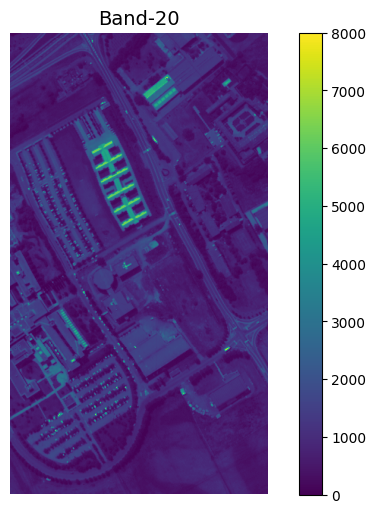

In [71]:
plot_band(dataset)

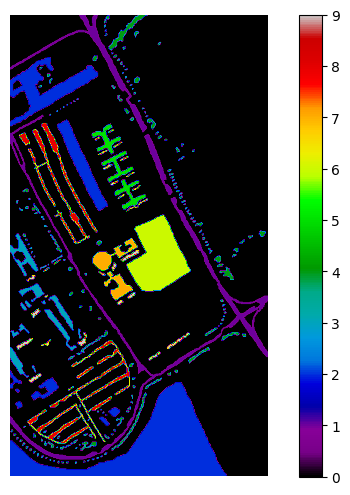

In [75]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='nipy_spectral')
plt.axis('off')
plt.colorbar(ticks= range(0,10))
plt.show()
     

# Extracting Band Information:

In [13]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

In [14]:
df = extract_pixels(dataset, ground_truth)
df.head()

100%|██████████| 103/103 [00:00<00:00, 139.24it/s]


,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-95,band-96,band-97,band-98,band-99,band-100,band-101,band-102,band-103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [15]:
df

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-95,band-96,band-97,band-98,band-99,band-100,band-101,band-102,band-103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207395,574,594,504,411,468,443,378,342,352,434,...,2150,2157,2157,2169,2151,2108,2077,2076,2136,0
207396,485,644,709,582,504,494,434,373,391,421,...,2264,2295,2282,2265,2275,2293,2274,2274,2258,0
207397,593,387,428,461,470,392,331,383,439,355,...,2393,2407,2433,2413,2373,2389,2382,2407,2423,0
207398,593,751,655,458,503,560,482,412,404,454,...,2340,2333,2332,2288,2251,2280,2312,2308,2289,0


In [16]:
df.to_csv('Dataset.csv', index=False)

In [38]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 104), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()

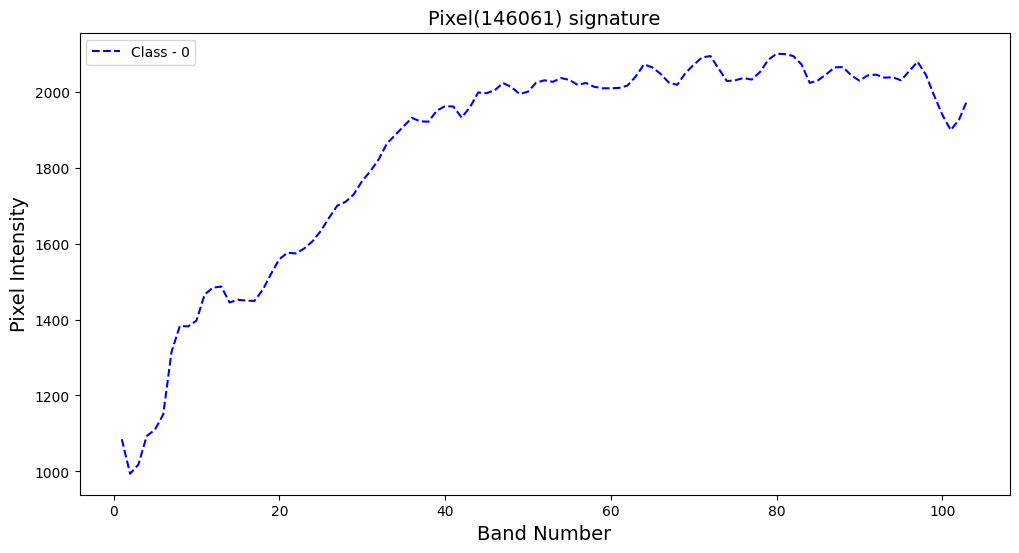

In [39]:
plot_signature(df)

In [25]:
df.sample(6)

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-95,band-96,band-97,band-98,band-99,band-100,band-101,band-102,band-103,class
123736,973,731,473,556,636,607,604,649,661,691,...,2581,2578,2609,2564,2537,2539,2586,2593,2528,0
146591,265,446,552,690,632,577,529,452,421,470,...,410,407,405,431,436,418,424,426,454,9
113289,725,611,384,358,424,435,415,482,529,499,...,674,673,662,696,736,741,724,716,745,0
141406,1191,1043,1069,1053,1030,1109,1070,932,951,1053,...,1712,1715,1687,1673,1709,1728,1682,1661,1696,0
181205,619,753,725,678,688,671,619,582,508,507,...,3128,3146,3134,3133,3096,3066,2994,2979,3059,0
131196,1099,1041,1067,1182,1401,1431,1347,1351,1385,1402,...,1187,1178,1168,1189,1173,1159,1153,1144,1161,1


In [26]:
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")

Unique Class Labels: [0 1 4 2 8 5 9 6 3 7]


In [27]:
df.loc[:, 'class'].value_counts()

0    164624
2     18649
1      6631
6      5029
8      3682
4      3064
3      2099
5      1345
7      1330
9       947
Name: class, dtype: int64

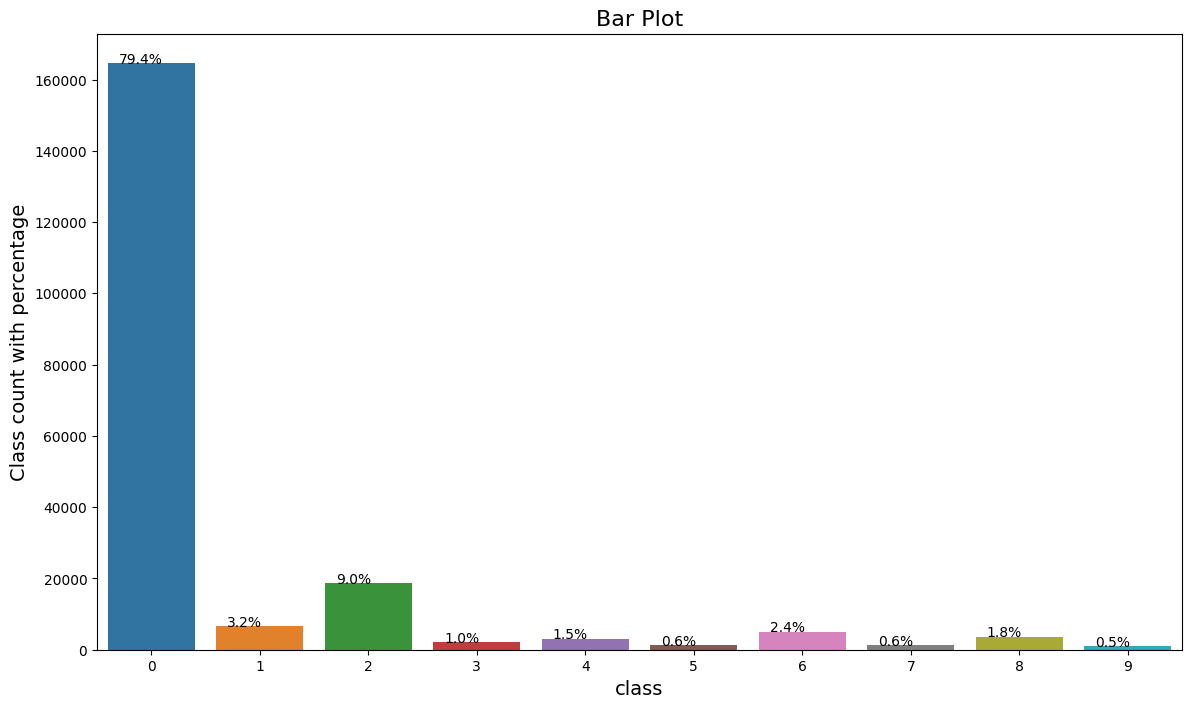

In [28]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='class', data=df[['class']])
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
#ax.yaxis.set_major_locator(ticker.LinearLocator(11))
plt.ylabel('Class count with percentage', fontsize=14)
plt.xlabel('class', fontsize=14)
plt.title('Bar Plot', fontsize=16)
plt.show()

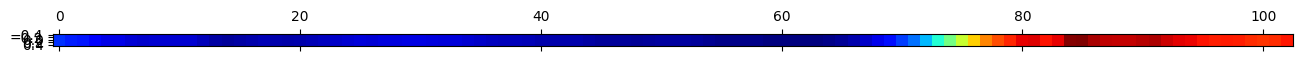

In [40]:
# Visualizing the pixel
plt.matshow(df.iloc[1, :-1].values.reshape(1,103), cmap='jet');

Enter the band Number(1-103) :103


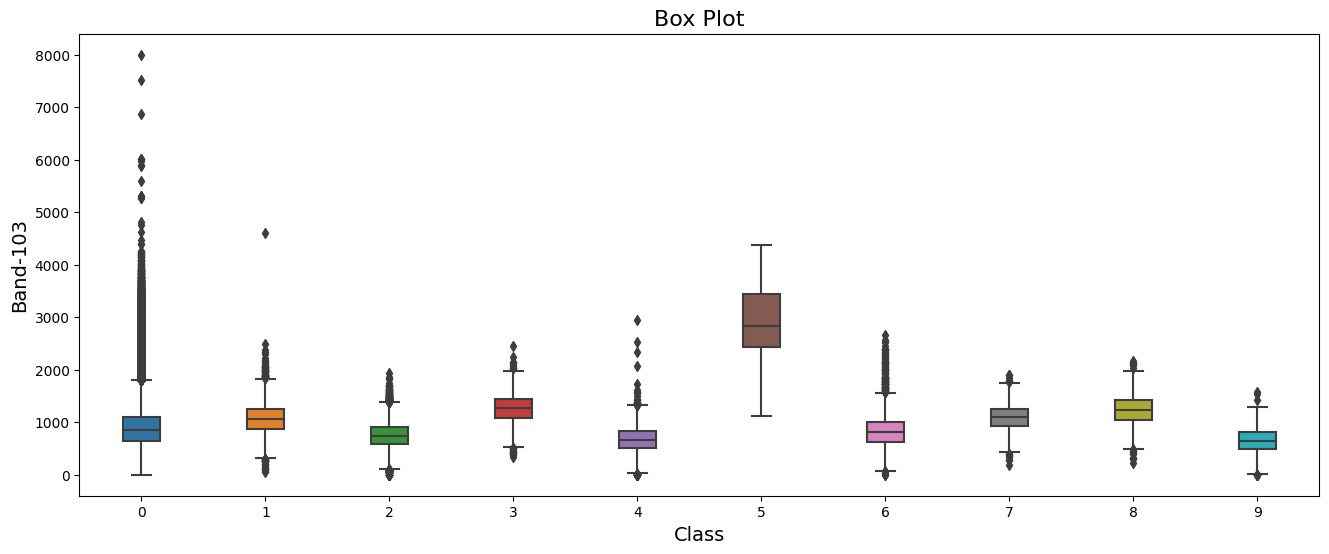

In [43]:
plt.figure(figsize=(16, 6))
n = int(input('Enter the band Number(1-103) :'))
sns.boxplot( x=df["class"], y=df["band-1"], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

In [44]:
print(f"Details of Band - {n}: \n\n{df['band-'+str(n)].describe()}")

Details of Band - 103: 

count    207400.000000
mean       2253.451692
std         844.165146
min           0.000000
25%        1692.000000
50%        2261.000000
75%        2715.000000
max        8000.000000
Name: band-103, dtype: float64


<ipython-input-45-04772714a7fd>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




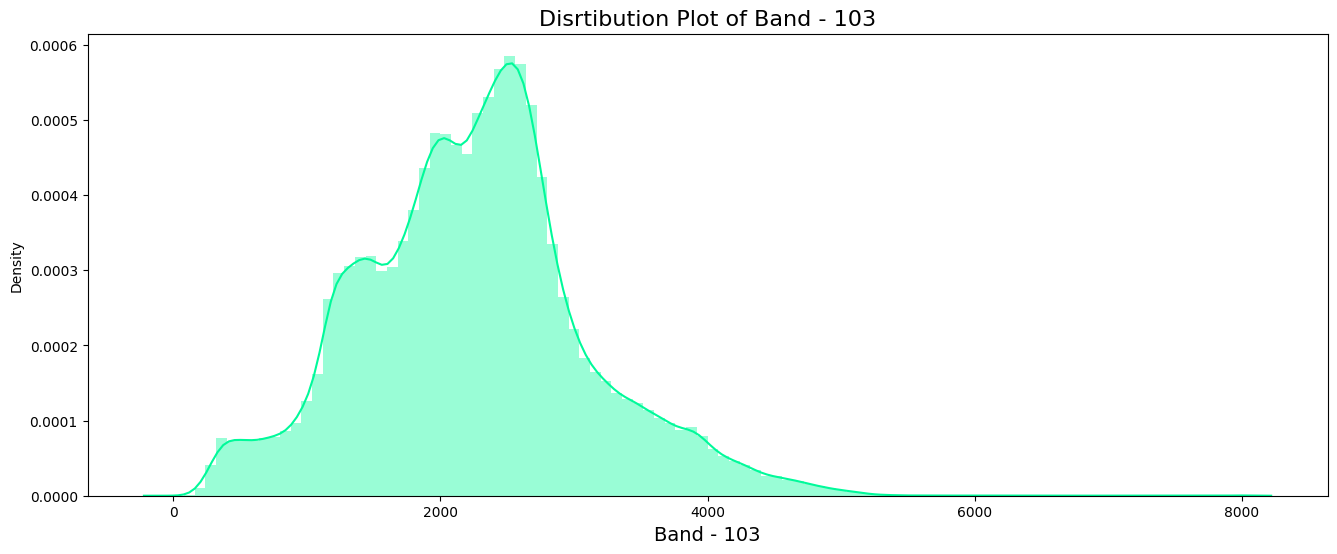

In [45]:
plt.figure(figsize=(16, 6))
sns.distplot(df['band-'+str(n)], color='mediumSpringGreen', bins=100, hist_kws={'alpha': 0.4});
plt.xlabel('Band - '+str(n), fontsize=14)
plt.title('Disrtibution Plot of Band - '+str(n), fontsize=16)
plt.show()